<a href="https://colab.research.google.com/github/AMAYadav/PROJECTS-/blob/main/factor_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.3 MB 13.6 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


Factor Modelling - To explain the Excess Returns of a portfolio or Assets using factors
 

In [3]:
asset='BAJAJ-AUTO.NS';start='2018-04-01';end= '2021-10-31'

[*********************100%***********************]  1 of 1 completed


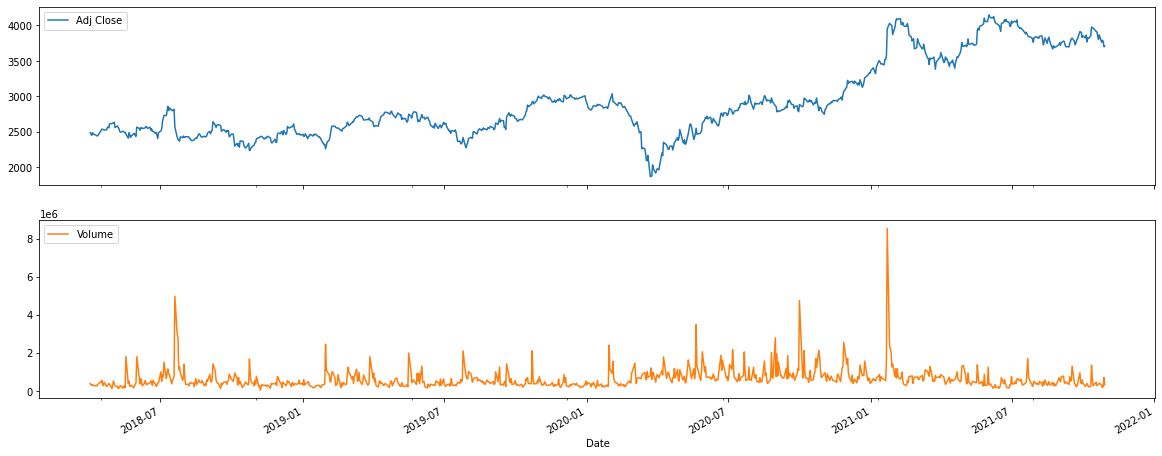

In [4]:
stock= yf.download(tickers='BAJAJ-AUTO.NS',start=start,end=end,rounding=True,auto_adjust=False)[['Adj Close','Volume']]
stock.plot(subplots=True,figsize=(20,8),kind='line')
plt.legend(loc='upper left')

In [5]:
del stock['Volume']
stock.head()

,Adj Close
Date,
2018-04-02,2490.29
2018-04-03,2475.27
2018-04-04,2452.22
2018-04-05,2489.58
2018-04-06,2470.30


In [6]:
y = stock['Adj Close'].resample('M') \
 .last() \
 .pct_change() \
 .dropna()

In [13]:
y.index= y.index.strftime('%Y-%m-%d')

In [14]:
y.name='returns'
y.head()

Date
2018-05-31   -0.068516
2018-06-30    0.021814
2018-07-31   -0.019482
2018-08-31    0.016591
2018-09-30   -0.020910
Name: returns, dtype: float64

In [54]:
file=pd.read_csv('/content/20191231_FourFactors_and_Market_Returns_Daily.csv')
file.tail()

,Date,SMB %,HML %,WML %,Rm %,Rf %,Rm-Rf %
6448,20191224,0.128780,-0.377013,-0.125645,-0.252654,0.019556,-0.272210
6449,20191226,1.066614,0.701855,0.021118,-0.338004,0.019632,-0.357636
6450,20191227,-0.256306,0.154563,0.230773,0.832854,0.019632,0.813222
6451,20191230,0.511752,-0.172321,-0.368719,0.157974,0.019632,0.138341
6452,20191231,0.946886,1.009567,-0.541485,-0.408609,0.019632,-0.428241


In [55]:
type(file.Date)

file.Date = pd.to_datetime(file.Date,format='%Y%m%d')
# file.set_index(file.Date)
file.Date.tail()

6448   2019-12-24
6449   2019-12-26
6450   2019-12-27
6451   2019-12-30
6452   2019-12-31
Name: Date, dtype: datetime64[ns]

In [56]:
file.columns

Index(['Date', 'SMB %', 'HML %', 'WML %', 'Rm %', 'Rf %', 'Rm-Rf %'], dtype='object')

In [ ]:
file[[(file.Date>'start')&(file.Date>'end')]]

In [52]:
a=file.loc[(file.Date == 'start') & (file.Date == 'end'),:]
a

,Date,SMB %,HML %,WML %,Rm %,Rf %,Rm-Rf %


In [63]:
file.Date[['2018-04-01':'2021-10-31',:]]



SyntaxError: ignored

In [64]:
file

,Date,SMB %,HML %,WML %,Rm %,Rf %,Rm-Rf %
0,1993-10-01,1.955335,0.621472,-0.138499,-0.651551,0.032158,-0.683708
1,1993-10-04,0.132747,-0.073547,0.950330,-0.943486,0.032158,-0.975644
2,1993-10-05,-0.299830,0.624285,-0.752456,-0.174840,0.032158,-0.206998
3,1993-10-06,-0.326007,-1.111785,-0.061290,-0.336029,0.032158,-0.368187
4,1993-10-07,-0.622899,0.396012,0.765609,0.316560,0.032158,0.284402
...,...,...,...,...,...,...,...
6448,2019-12-24,0.128780,-0.377013,-0.125645,-0.252654,0.019556,-0.272210
6449,2019-12-26,1.066614,0.701855,0.021118,-0.338004,0.019632,-0.357636
6450,2019-12-27,-0.256306,0.154563,0.230773,0.832854,0.019632,0.813222
6451,2019-12-30,0.511752,-0.172321,-0.368719,0.157974,0.019632,0.138341
